In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lending Club Loan Data Analysis

**Objective**: Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**
For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain:** Finance

**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model.


###**Dataset columns and definition:**

●	**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

●**purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

●**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

●**installment:** The monthly installments owed by the borrower if the loan is funded.

●**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

●**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

●**fico:** The FICO credit score of the borrower.

●**days.with.cr.line:** The number of days the borrower has had a credit line.

●**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

●**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

●**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

●**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

●**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
#loading dataset to python environment
df = pd.read_csv('loan_data.csv')

In [3]:
# Displaying dataset
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [4]:
# Displaying shape of dataset
df.shape

(9578, 14)

In [5]:
#Dropping purpose column
loan= df.drop('purpose',axis=1)

In [28]:
# importing Profile Report
from ydata_profiling import ProfileReport

In [29]:
# Displaying the profiling report of the dataset
loan_report=ProfileReport(loan)
loan_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Encoding categorical columns
loan =pd.get_dummies(loan,columns=['credit.policy'],drop_first=True,dtype=int)

#### Columns having high correlation
* fico is highly overall correlated with int.rate and 1 other fields
* int.rate is highly overall correlated with fico
* revol.bal is highly overall correlated with revol.util
* revol.util is highly overall correlated with fico and 1 other fields

Drop fico,revol.util to avoid multicollinearity

In [10]:
# Dropping columns with high correlation
loan=loan.drop(['fico','revol.util'],axis=1)

In [11]:
# Analying and handling the outliers
out_cols =['int.rate','installment','log.annual.inc','dti','days.with.cr.line',
           'revol.bal','inq.last.6mths','delinq.2yrs','pub.rec']

for i in out_cols:
  Q1=np.percentile(loan[i],25,interpolation='midpoint')
  Q2=np.percentile(loan[i],50,interpolation='midpoint')
  Q3=np.percentile(loan[i],75,interpolation='midpoint')

  IQR=Q3-Q1
  up_lim=Q3+1.5*IQR
  low_lim=Q1-1.5*IQR
  up_lim_extm = loan[i].quantile(0.75) + (IQR * 3)
  print("The upper limit and upper limit extreme of {} is {} and {}. ".format(i,
        up_lim,up_lim_extm))

  outliers=[]
  for k in loan[i]:
    if((k<low_lim)or(k>up_lim)):
        outliers.append(k)
  #print(outliers)

  print('{} > {}: {}'.format(i, up_lim,loan[loan[i]>up_lim].shape[0]))
  print('Percentage of outliers in {}: {}'.format(i,
        loan[loan[i]>up_lim].shape[0]/float(loan.shape[0])))

  # limiting outliers to the upper extreme values
  loan.loc[loan[i]>up_lim,i] = up_lim
  print("Maximum value after treating outliers is ", loan[i].max())

The upper limit and upper limit extreme of int.rate is 0.19589999999999996 and 0.25109999999999993. 
int.rate > 0.19589999999999996: 51
Percentage of outliers in int.rate: 0.005324702443098768
Maximum value after treating outliers is  0.19589999999999996
The upper limit and upper limit extreme of installment is 835.9075 and 1239.3275. 
installment > 835.9075: 239
Percentage of outliers in installment: 0.024953017331384424
Maximum value after treating outliers is  835.9075
The upper limit and upper limit extreme of log.annual.inc is 12.3893945075 and 13.4884701025. 
log.annual.inc > 12.3893945075: 121
Percentage of outliers in log.annual.inc: 0.012633117561077468
Maximum value after treating outliers is  12.3893945075
The upper limit and upper limit extreme of dti is 34.052499999999995 and 50.155. 
dti > 34.052499999999995: 0
Percentage of outliers in dti: 0.0
Maximum value after treating outliers is  29.96
The upper limit and upper limit extreme of days.with.cr.line is 10095.0 and 1446

In [12]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()

s_data = loan.drop(['not.fully.paid'],axis=1)
s_data= ms.fit_transform(s_data)
s_data=pd.DataFrame(s_data,columns=['int.rate', 'installment', 'log.annual.inc',
                    'dti', 'days.with.cr.line','revol.bal', 'inq.last.6mths',
                    'delinq.2yrs', 'pub.rec','credit.policy_1'])
s_data.head()

int.rate  installment  log.annual.inc       dti  days.with.cr.line  \
0  0.433407     0.991701        0.785417  0.650200           0.550724   
1  0.346578     0.259132        0.730012  0.476969           0.260290   
2  0.557027     0.428156        0.583654  0.388184           0.456941   
3  0.300221     0.178814        0.785417  0.270360           0.254235   
4  0.607800     0.106372        0.774951  0.499666           0.391995   

   revol.bal  inq.last.6mths  delinq.2yrs  pub.rec  credit.policy_1  
0   0.706565             0.0          0.0      0.0              1.0  
1   0.823346             0.0          0.0      0.0              1.0  
2   0.085976             0.2          0.0      0.0              1.0  
3   0.824424             0.2          0.0      0.0              1.0  
4   0.116071             0.0          0.0      0.0              1.0

In [13]:
# concatenating dataset after scaling
loan= loan.drop(['int.rate', 'installment', 'log.annual.inc','dti',
                 'days.with.cr.line','revol.bal', 'inq.last.6mths',
                 'delinq.2yrs', 'pub.rec','credit.policy_1'],axis=1)
loan= pd.concat([loan,s_data],axis=1)
loan.head()

not.fully.paid  int.rate  installment  log.annual.inc       dti  \
0               0  0.433407     0.991701        0.785417  0.650200   
1               0  0.346578     0.259132        0.730012  0.476969   
2               0  0.557027     0.428156        0.583654  0.388184   
3               0  0.300221     0.178814        0.785417  0.270360   
4               0  0.607800     0.106372        0.774951  0.499666   

   days.with.cr.line  revol.bal  inq.last.6mths  delinq.2yrs  pub.rec  \
0           0.550724   0.706565             0.0          0.0      0.0   
1           0.260290   0.823346             0.0          0.0      0.0   
2           0.456941   0.085976             0.2          0.0      0.0   
3           0.254235   0.824424             0.2          0.0      0.0   
4           0.391995   0.116071             0.0          0.0      0.0   

   credit.policy_1  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

In [14]:
# Displaying the number of unique values in target
loan['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

The dataset is imbalanced we need to handle it before modeling.

In [15]:
# seperate features and target
x=loan.drop('not.fully.paid',axis=1)
y=loan['not.fully.paid']

In [16]:
# Spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

train_ratio = 0.80
validation_ratio = 0.15
test_ratio = 0.05

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print("Shape of training, validation and testing set : ",x_train.shape, x_val.shape, x_test.shape)

Shape of training, validation and testing set :  (7662, 10) (1437, 10) (479, 10)


#### Handling imbalanced dataset

In [17]:
#Handling the imbalanced dataset using SMOTE technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


After OverSampling, the shape of train_X: (12876, 10)
After OverSampling, the shape of train_y: (12876,) 

Before OverSampling, counts of label '1': 1224
Before OverSampling, counts of label '0': 6438
After OverSampling, counts of label '1': 6438
After OverSampling, counts of label '0': 6438


### DNN Modeling

In [18]:
#importing the tensorfow library for deep learning
import tensorflow as tf
from keras import regularizers

In [19]:
#Develop model architecture
model =tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.BatchNormalization(input_shape = (10,)))

#Hidden layers
model.add(tf.keras.layers.Dense(10, activation = 'relu',kernel_regularizer=regularizers.L2(l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(20, activation = 'relu',kernel_regularizer=regularizers.L2(l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())

# Otput layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [20]:
# Displaying model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 10)                40        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 batch_normalization_2 (Bat  (None, 20)                8

In [21]:
# Compile the model - Specify parameters for compiling
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [22]:
# Fiting the model
dnn = model.fit(x_train_res,y_train_res,
          validation_data = (x_val,y_val),epochs =50,
          batch_size=256)

Epoch 1/50
51/51 [==============================] - 6s 19ms/step - loss: 0.8466 - accuracy: 0.4708 - val_loss: 0.7889 - val_accuracy: 0.2227
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.8241 - accuracy: 0.4783 - val_loss: 0.7728 - val_accuracy: 0.3069
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 0.8006 - accuracy: 0.4925 - val_loss: 0.7480 - val_accuracy: 0.4461
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 0.7812 - accuracy: 0.5019 - val_loss: 0.7343 - val_accuracy: 0.4920
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 0.7701 - accuracy: 0.5065 - val_loss: 0.7317 - val_accuracy: 0.5087
Epoch 6/50
51/51 [==============================] - 1s 10ms/step - loss: 0.7575 - accuracy: 0.5132 - val_loss: 0.7316 - val_accuracy: 0.5254
Epoch 7/50
51/51 [==============================] - 0s 8ms/step - loss: 0.7449 - accuracy: 0.5256 - val_loss: 0.7322 - val_accuracy: 0.5317
Epoch 8/50
51/51 [

In [23]:
#Evaluate model on test data
model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 4ms/step - loss: 0.6782 - accuracy: 0.5971


[0.6782492399215698, 0.5970772504806519]

In [25]:
#getting the predictions for test data

ypred=(model.predict(x_test)>0.5).astype("int32")
ypred = ypred.flatten()

# Create a DataFrame for test data and predictions
predicted_and_test = pd.DataFrame({'Test': y_test, 'Predicted': ypred })
print(predicted_and_test.head(10))

15/15 [==============================] - 1s 4ms/step
      Test  Predicted
7702     1          1
2537     0          0
4412     0          0
8549     0          0
1947     0          0
4469     0          1
8905     0          1
7017     0          1
3320     0          1
9248     0          1


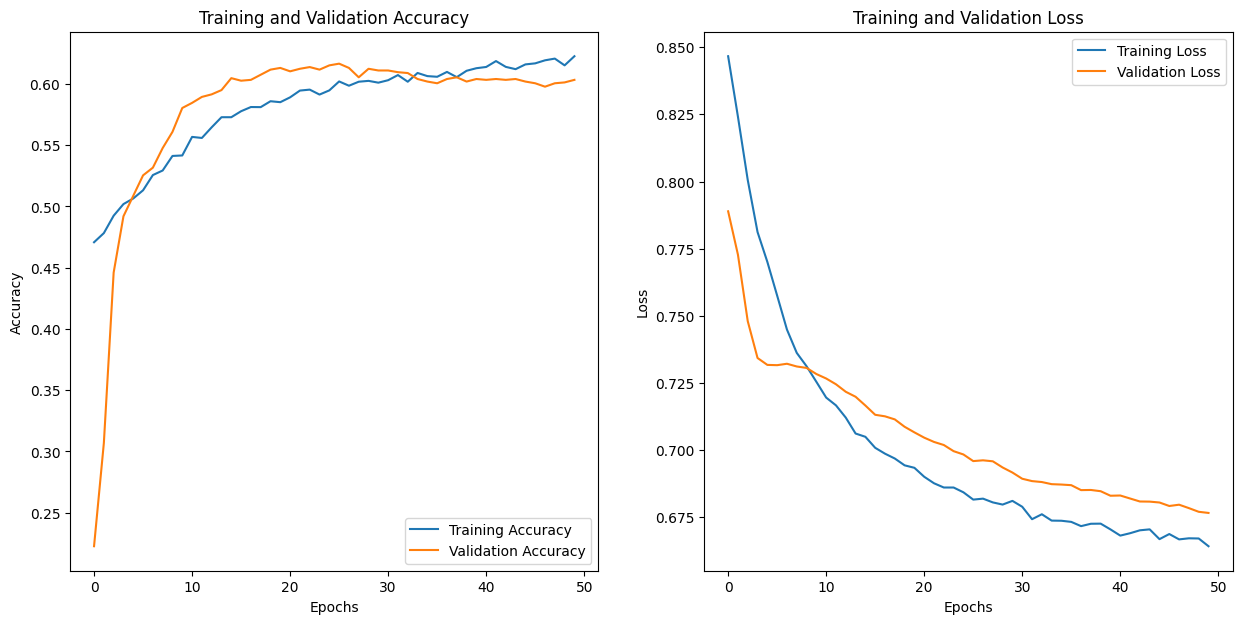

In [24]:
#ploting the accuracy and loss
acc = dnn.history['accuracy']
val_acc = dnn.history['val_accuracy']
epochs=50

loss = dnn.history['loss']
val_loss = dnn.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Good Fit Learning Curves**

A good fit is the goal of the learning algorithm and exists between an overfit and underfit model.

A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.

The loss of the model will almost always be lower on the training dataset than the validation dataset. This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the “generalization gap.”

A plot of learning curves shows a good fit if:

* The plot of training loss decreases to a point of stability.
* The plot of validation loss decreases to a point of stability and has a small gap with the training loss.
* An ideal model will have both accuracy curves converge to high values.

**Inferences from modeling and Hyperparameter Tuning**

When a basic DNN model was developed and fit without specifying any hyperparameters observed accuracy was in 90's and validation accuracy was in 70's. But this was due to overfitting. After anlayzing the learning curves, hyperparameter tuning was done. Different number of layers, neurons, learning rate, regularization,optimizers,activation, batch normalization, droupouts, epochs and batch size were tried during the trail and error method for tuning hyperparameters. Variations in model performance for different train, validation and test ratio sets were also checked.

After that the accuracy of the model decreased but the learning curves improved a lot. Fluctuations in learning curves were overcomed after using correct learning rate and regularization factor. Batch normalization and drop outs  improved the performance of model considerably. A optimized DNN model was finalized with minimum complexity.